#<font  color='Orange'>Data Preparation & KNN Classification</font>


# <font color = 'Orange'> Read your Dataset (.csv)</font>
run the code below for downloading the dataset

In [ ]:
!gdown 1CkUp_wtuauTNL9aOW-K52jDlTXqD4KWS

Downloading...
From: https://drive.google.com/uc?id=1CkUp_wtuauTNL9aOW-K52jDlTXqD4KWS
To: /content/diabetes.csv
100% 23.8k/23.8k [00:00<00:00, 60.3MB/s]


In [ ]:
import pandas as pd

df = pd.read_csv('/content/diabetes.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

# <font color = 'Orange'> Data preprocessing </font>

Context
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

Content
The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

Input columns: Pregnancies, Glucose, BloodPressure,SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age

Output columns: Outcome 0-->doesn't have diabetes / 1--> has diabetes

## <font color = 'Orange'>Detect the Missing values</font>

Count the percentage of missing values in every column of the Dataset.

In [ ]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148,72,35.0,0,33.6,0.627,50,1
1,1.0,85,66,29.0,0,26.6,0.351,31,0
2,8.0,183,64,0.0,0,23.3,0.672,32,1
3,1.0,89,66,23.0,94,28.1,0.167,21,0
4,0.0,137,40,35.0,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10.0,101,76,48.0,180,32.9,0.171,63,0
764,2.0,122,70,27.0,0,36.8,0.340,27,0
765,5.0,121,72,23.0,112,26.2,0.245,30,0
766,1.0,126,60,0.0,0,30.1,0.349,47,1


In [ ]:
df_ms = df.isnull().sum()
per_df = df_ms / len(df_ms) * 100
per_df

Pregnancies                 155.555556
Glucose                       0.000000
BloodPressure                 0.000000
SkinThickness                88.888889
Insulin                       0.000000
BMI                         111.111111
DiabetesPedigreeFunction      0.000000
Age                           0.000000
Outcome                       0.000000
dtype: float64

## <font color = 'Orange'> Find reasons for the missing values</font>


With the help of visualization matrix, heatmap, dendrogram, show the dependence between the columns with missing values

Visualize the missing values using Missingno library

In [ ]:
import missingno as msno

<Axes: >

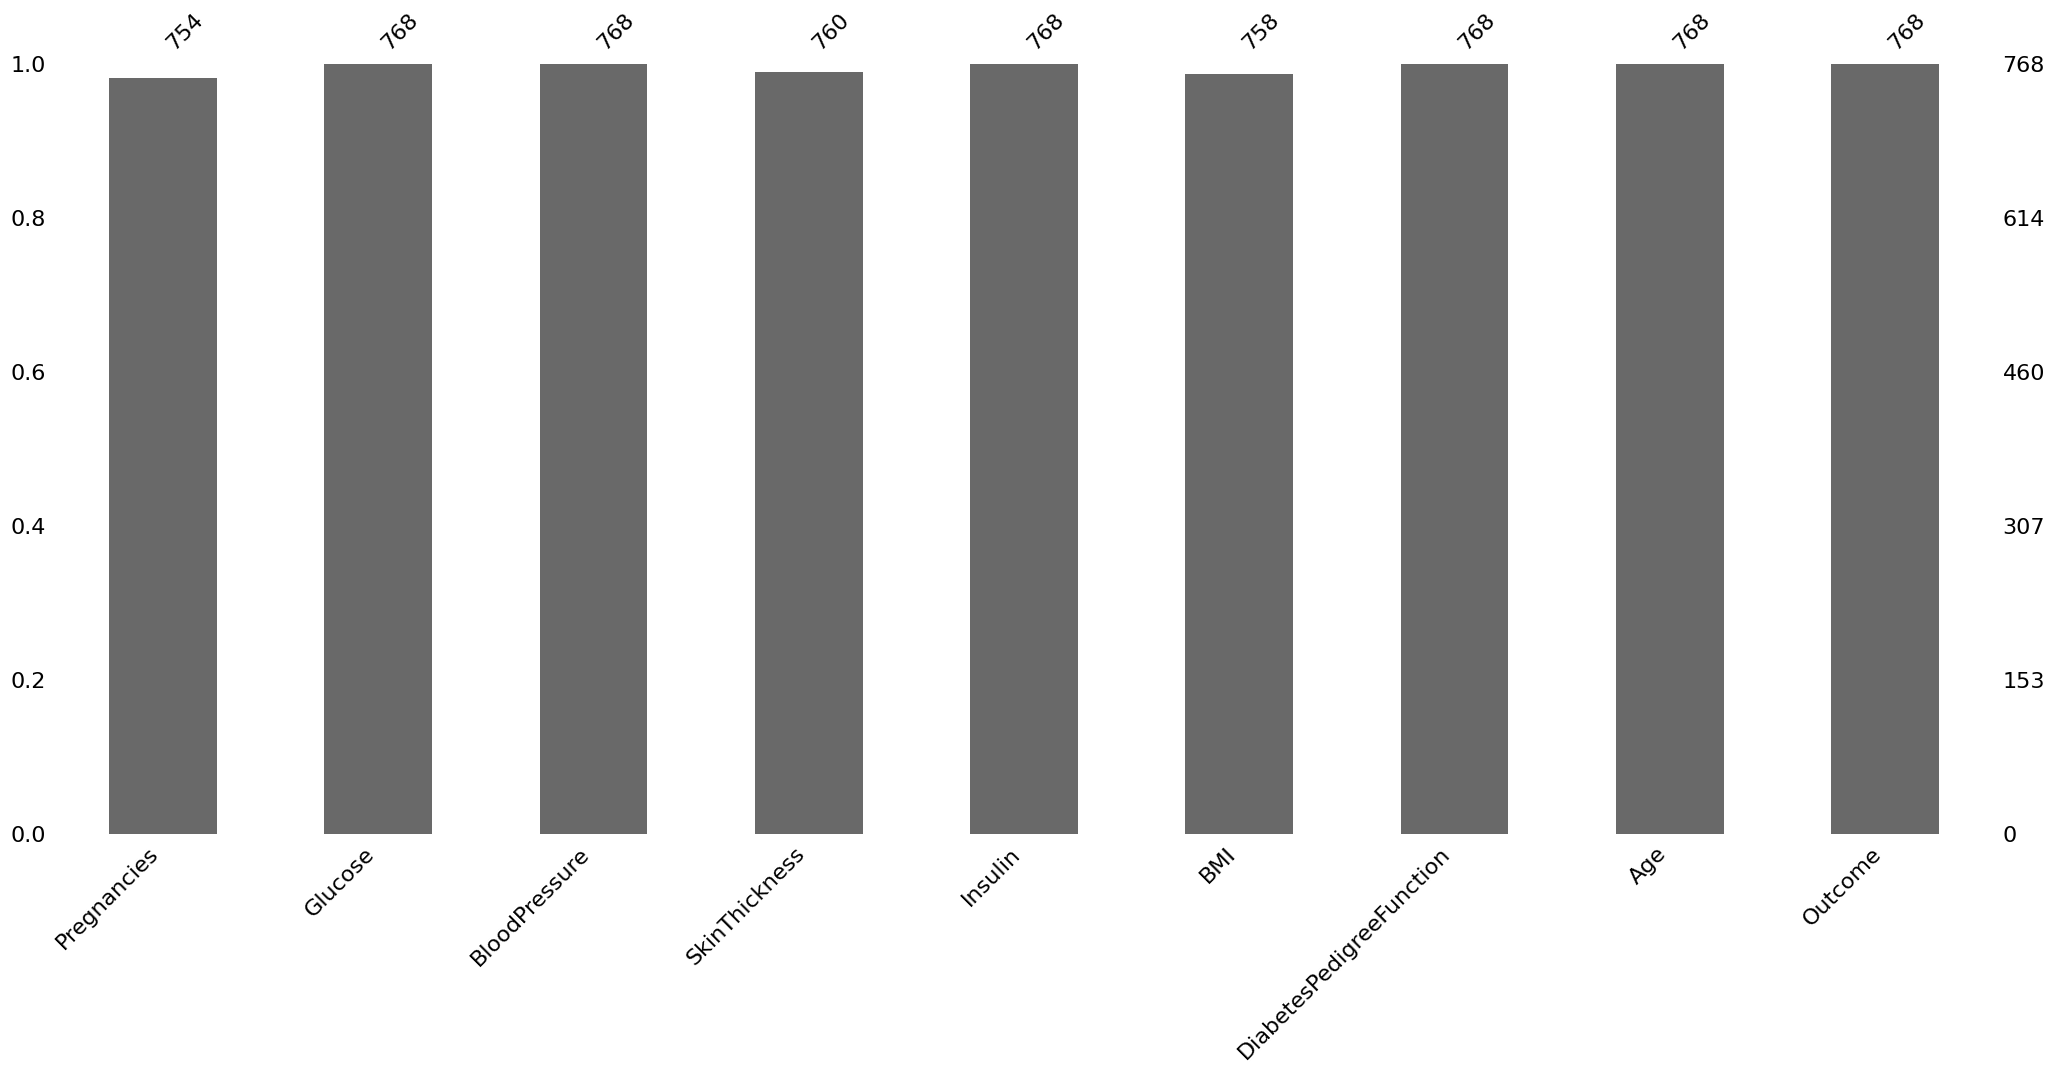

In [ ]:
msno.bar(df)

<Axes: >

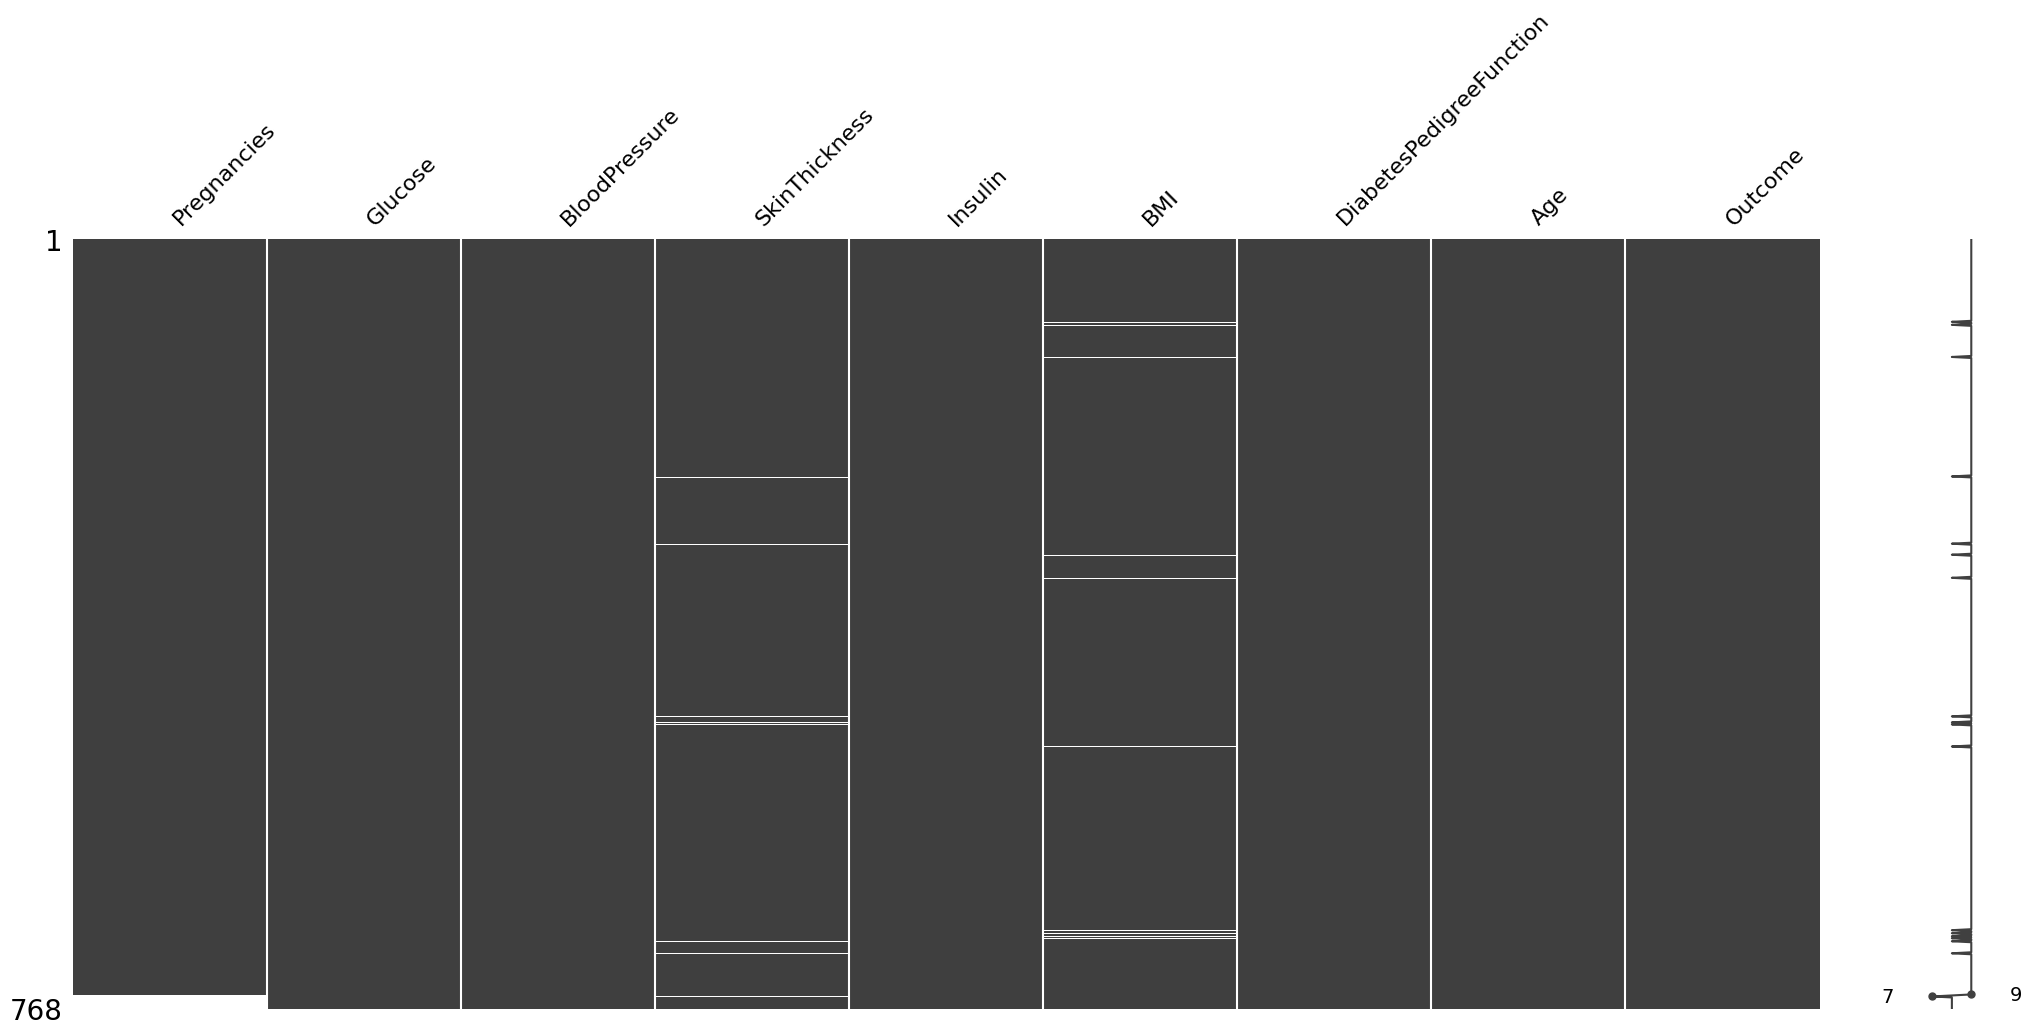

In [ ]:
msno.matrix(df.sort_values('Pregnancies'))

<Axes: >

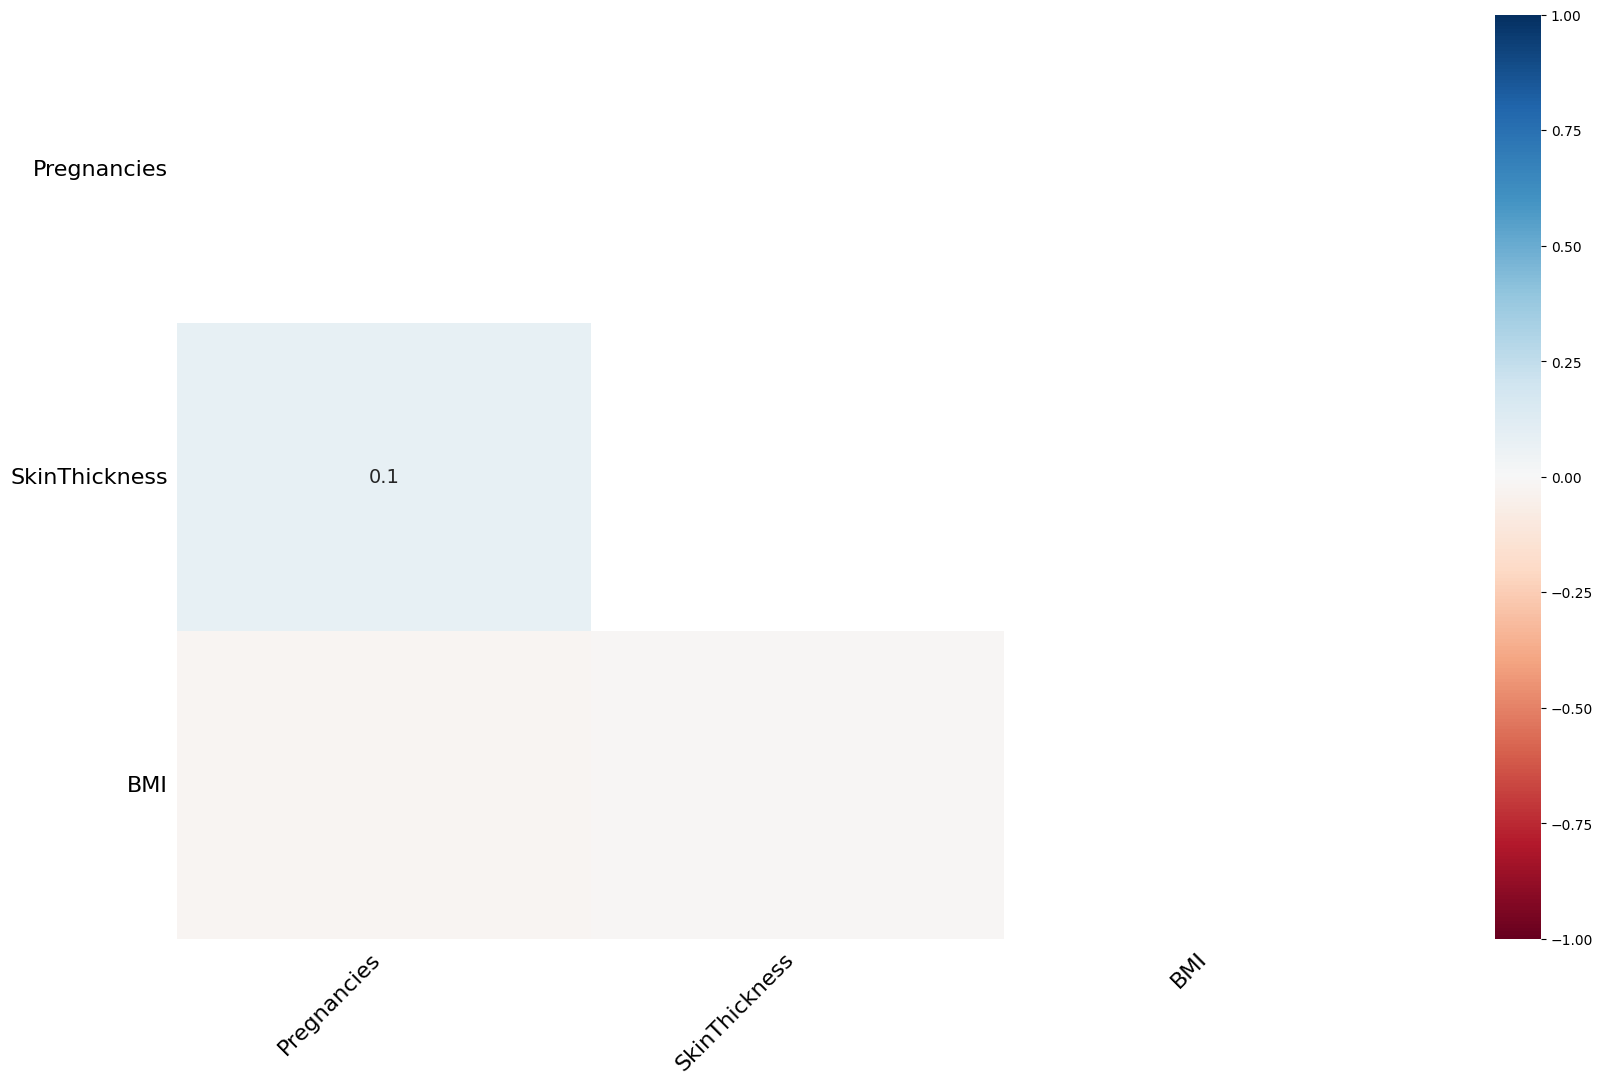

In [ ]:
msno.heatmap(df)

<Axes: >

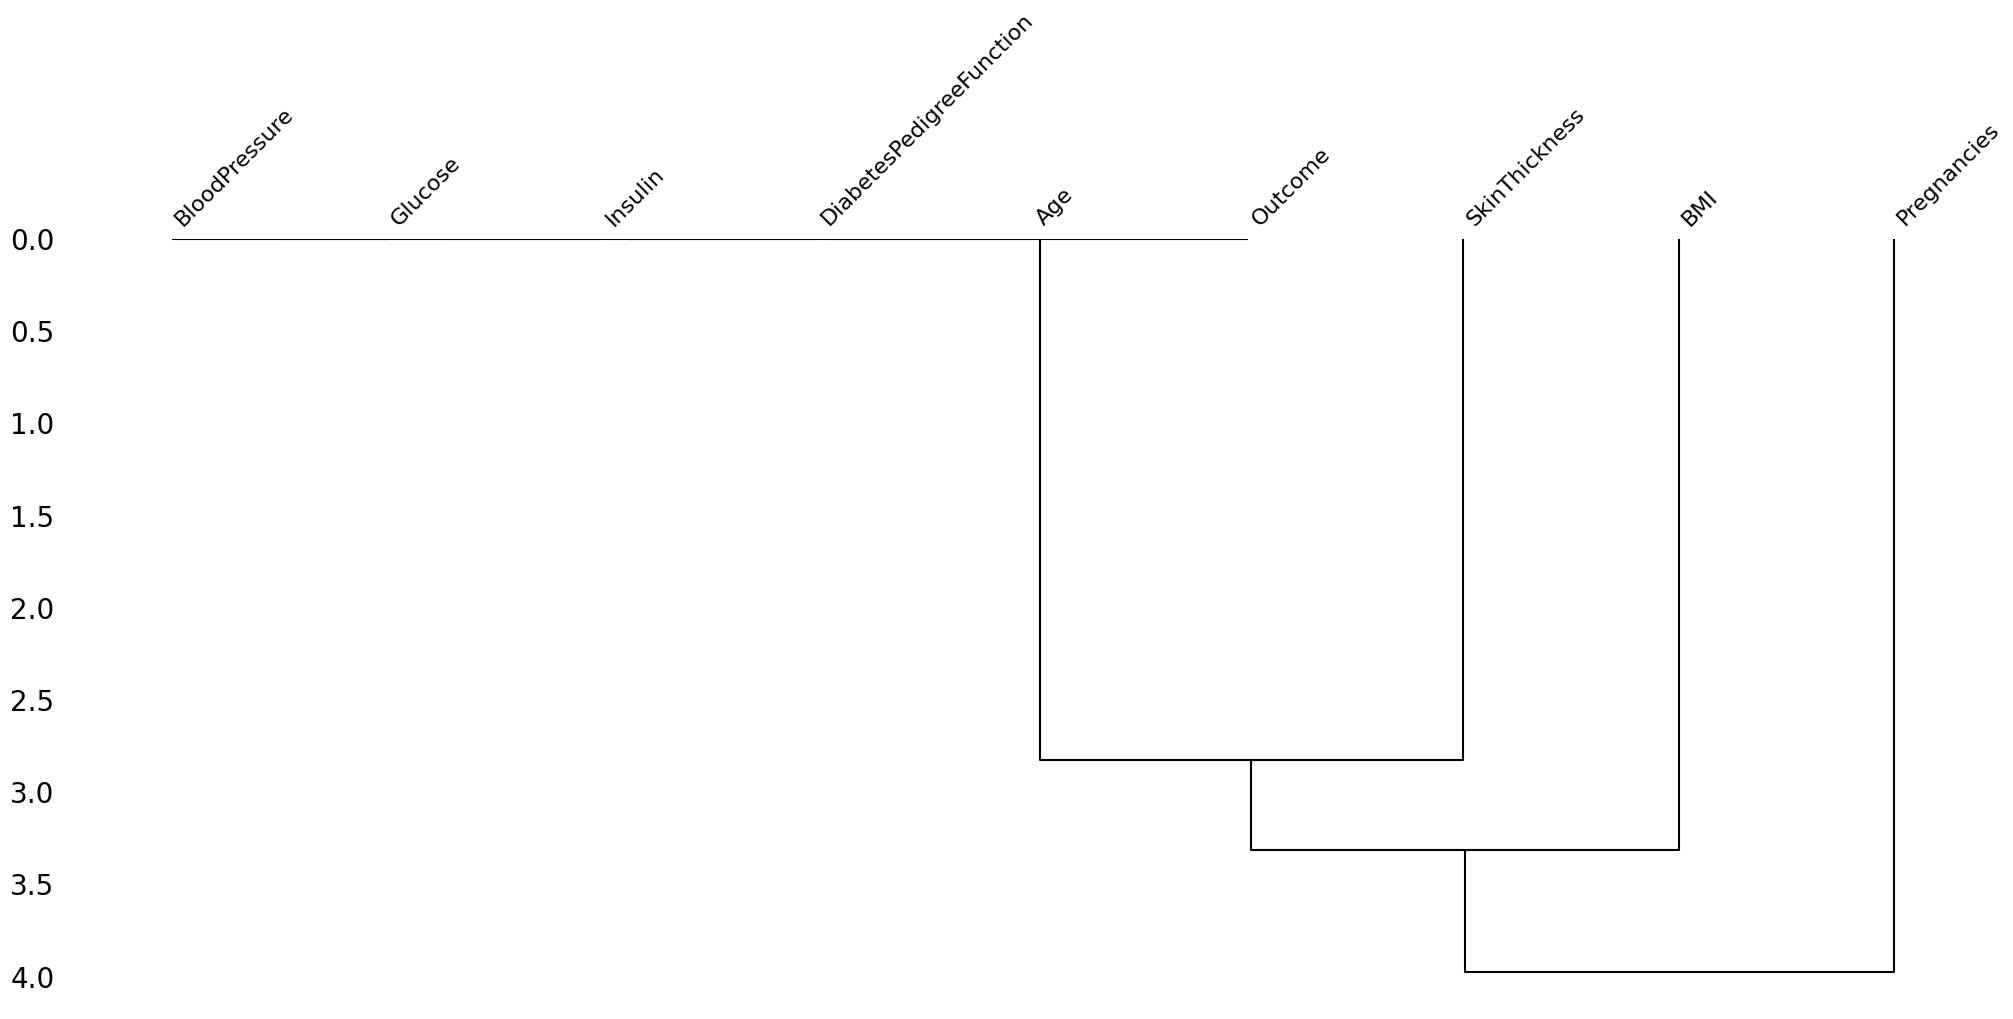

In [ ]:
msno.dendrogram(df)

## <font color = 'Orange'>Handle the missing values</font>

In [ ]:
import pandas as pd

In [ ]:
df_new = df.dropna()

In [ ]:
dfs = df_new.isnull().sum()
dfs

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## <font color = 'Orange'>Save the new Dataset(.csv) without the missing values</font>

In [ ]:
df_new.to_csv('new_df.csv', index = False)

Print the first rows of your final Dataset

In [ ]:
dfs = pd.read_csv('/content/new_df.csv')
dfs

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148,72,35.0,0,33.6,0.627,50,1
1,1.0,85,66,29.0,0,26.6,0.351,31,0
2,8.0,183,64,0.0,0,23.3,0.672,32,1
3,1.0,89,66,23.0,94,28.1,0.167,21,0
4,0.0,137,40,35.0,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
732,10.0,101,76,48.0,180,32.9,0.171,63,0
733,2.0,122,70,27.0,0,36.8,0.340,27,0
734,5.0,121,72,23.0,112,26.2,0.245,30,0
735,1.0,126,60,0.0,0,30.1,0.349,47,1


# <font color='orange'>KNN Classification</font>

##<font color = 'Orange'>Split the dataset for training and testing in ratio 80:20 </font>


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = dfs[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
y = dfs['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## <font color = 'Orange'>Initialize the KNN Classification model, and use the fit function for training the model</font>

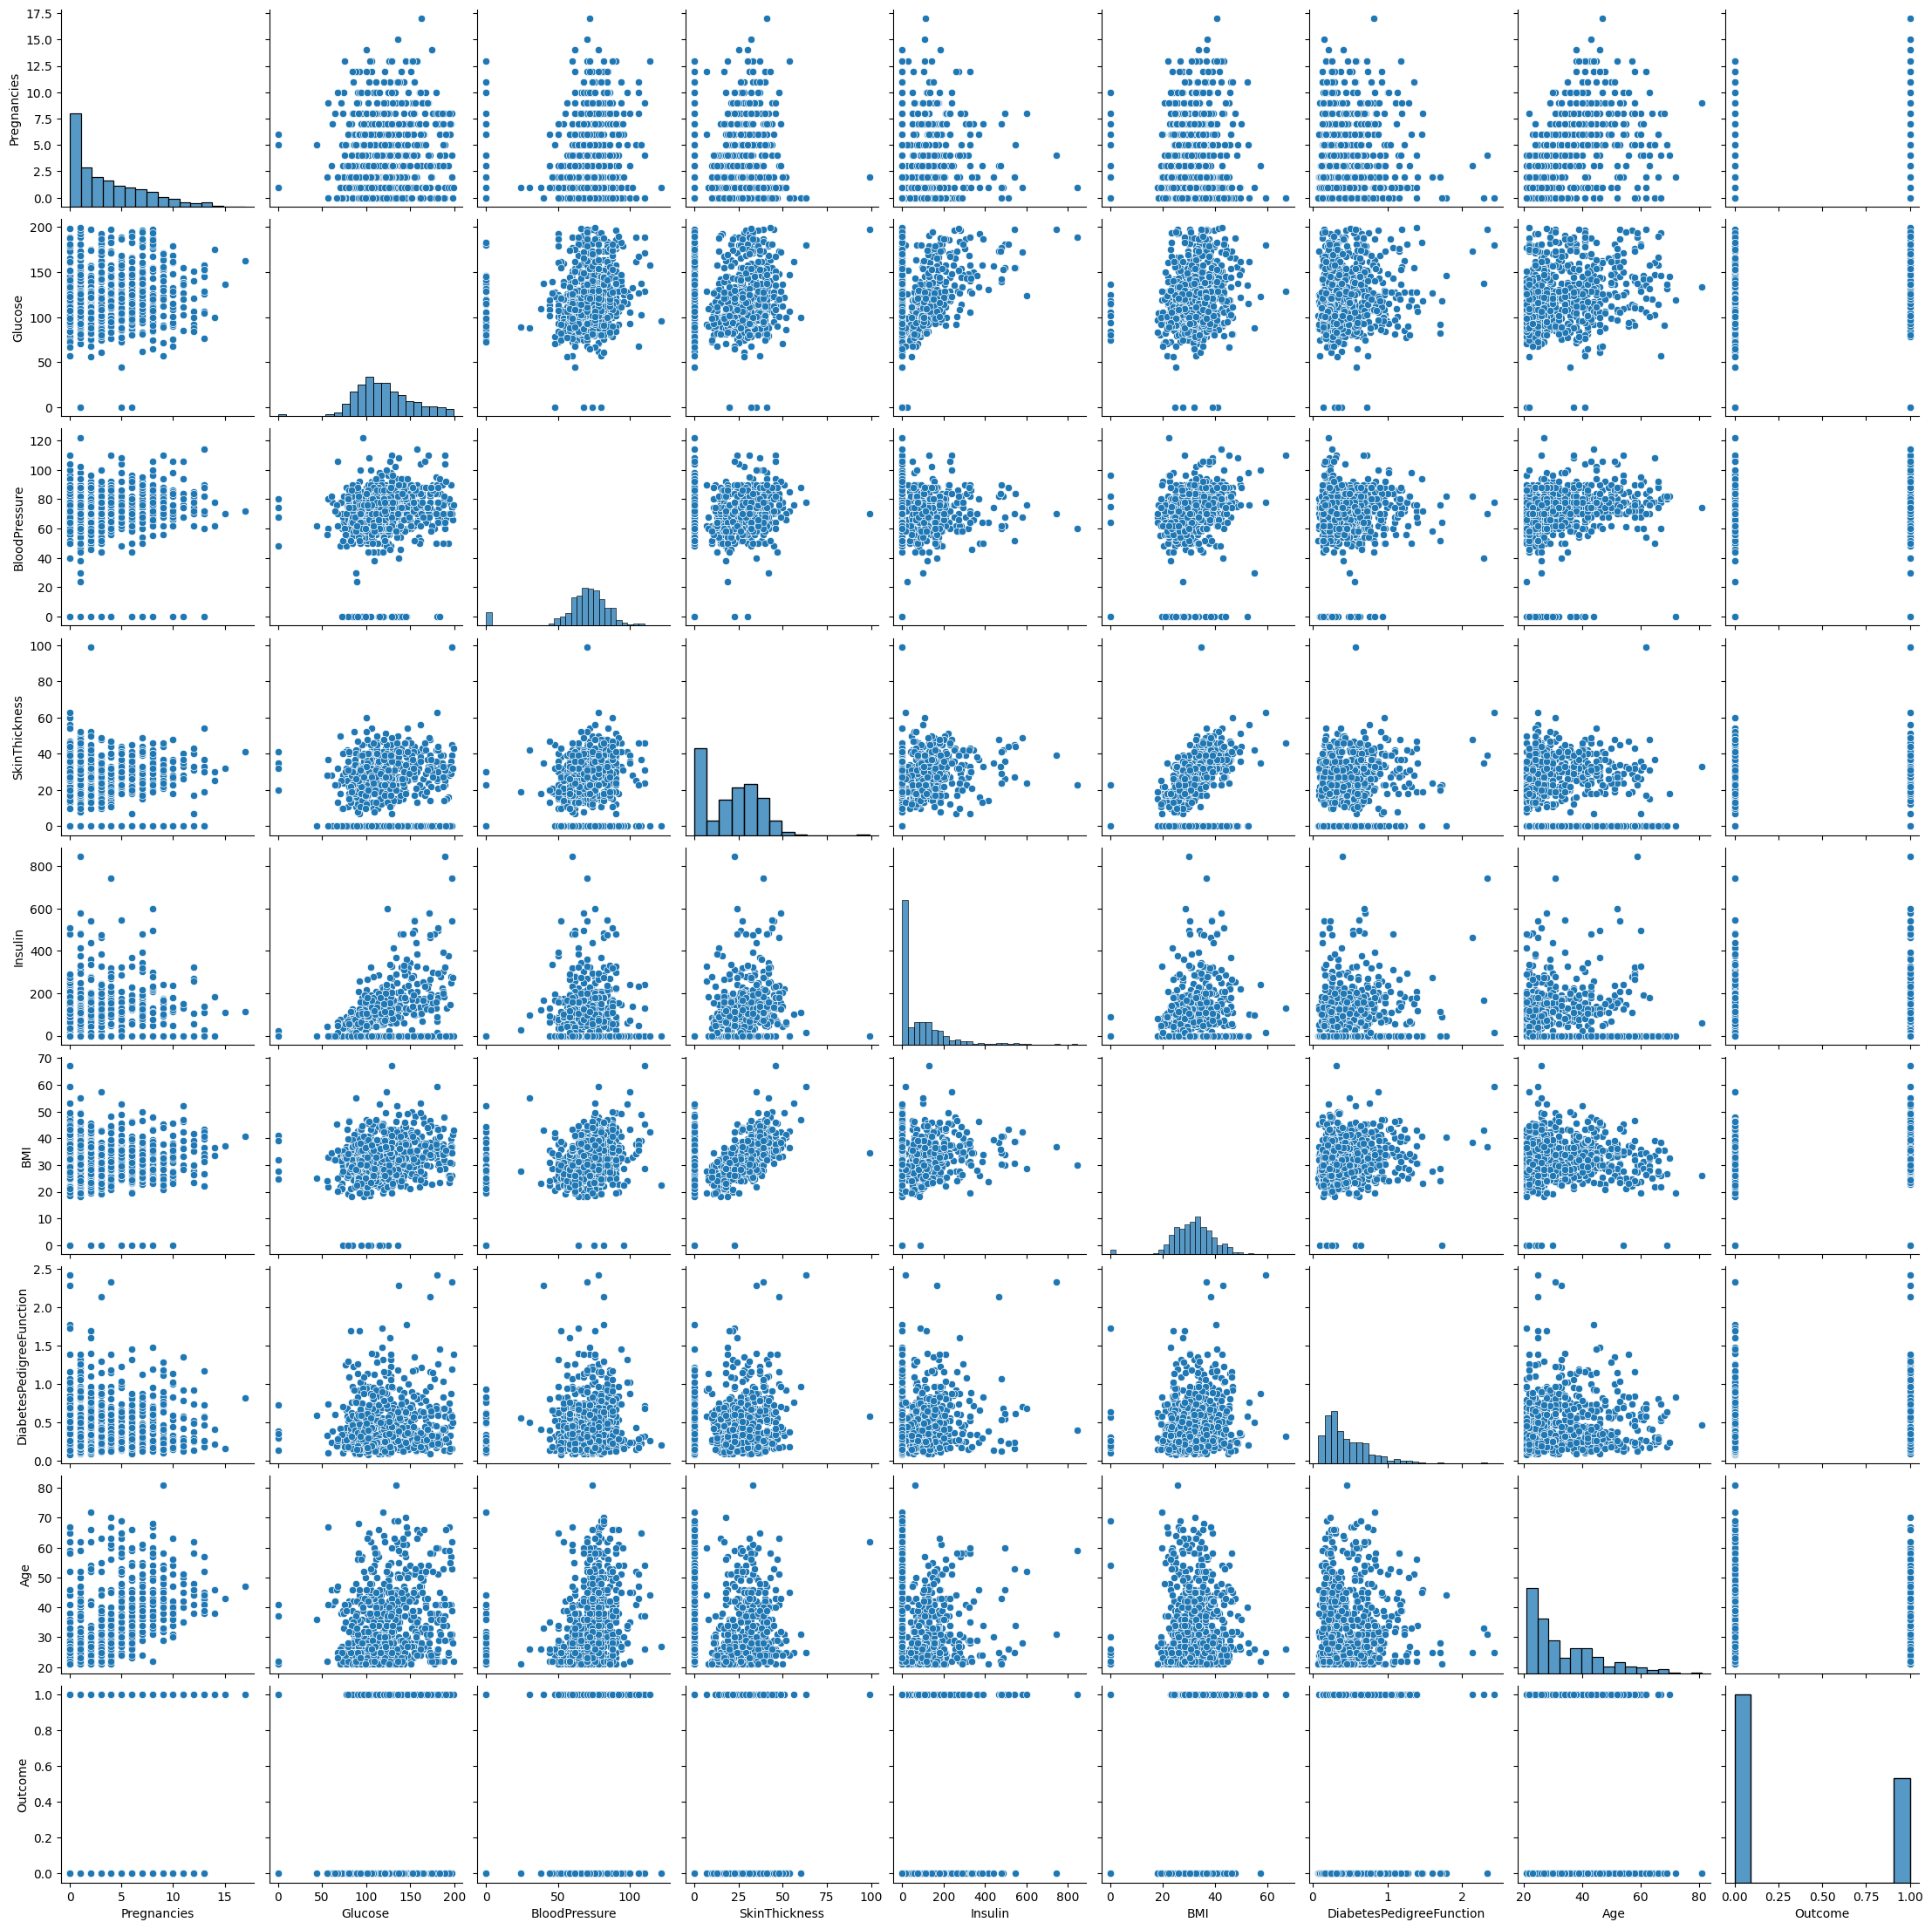

In [ ]:
import seaborn as sns
sns.pairplot(dfs)

In [ ]:
t = dfs.drop('Outcome', axis='columns')

X = dfs[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
y = dfs['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
457,4.0,99,72,17.0,0,25.6,0.294,28
388,3.0,129,64,29.0,115,26.4,0.219,28
600,0.0,102,78,40.0,90,34.5,0.238,24
610,4.0,128,70,0.0,0,34.3,0.303,24
35,7.0,106,92,18.0,0,22.7,0.235,48
...,...,...,...,...,...,...,...,...
688,5.0,97,76,27.0,0,35.6,0.378,52
728,6.0,190,92,0.0,0,35.5,0.278,66
331,5.0,158,70,0.0,0,29.8,0.207,63
32,4.0,111,72,47.0,207,37.1,1.390,56


In [ ]:
dfs['Outcome'].value_counts()

0    474
1    263
Name: Outcome, dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
cl = KNeighborsClassifier(n_neighbors=5)

In [ ]:
cl.fit(X_train, y_train)

KNeighborsClassifier()

## <font color = 'Orange'>Predict the outcomes for X test</font>

In [ ]:
y_pred = cl.predict(X_test)
y_pred

array([1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0])

## <font color = 'Orange'>See the model performance, by using sklearn metrics for classification</font>



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score

In [ ]:
confusion_matrix(y_test, y_pred)

array([[82, 14],
       [24, 28]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.85      0.81        96
           1       0.67      0.54      0.60        52

    accuracy                           0.74       148
   macro avg       0.72      0.70      0.70       148
weighted avg       0.74      0.74      0.74       148



In [ ]:
f1_score(y_test, y_pred)

0.5957446808510638